In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = "adriankiezun/imdb-dataset-2023"
api.dataset_download_files(dataset, path="./", unzip=True)

# Load the dataset
import pandas as pd
df = pd.read_csv("imdb_data.csv")
print(df.head())


Dataset URL: https://www.kaggle.com/datasets/adriankiezun/imdb-dataset-2023
          id    primaryTitle   originalTitle  isAdult  runtimeMinutes  \
0  tt0035423  Kate & Leopold  Kate & Leopold        0             118   
1  tt0065421  The Aristocats  The AristoCats        0              78   
2  tt0065938  Kelly's Heroes  Kelly's Heroes        0             144   
3  tt0066026         M*A*S*H         M*A*S*H        0             116   
4  tt0066206          Patton          Patton        0             172   

                       genres  averageRating  numVotes    budget       gross  \
0      Comedy,Fantasy,Romance            6.4     87925  48000000  76019048.0   
1  Adventure,Animation,Comedy            7.1    111758   4000000  35459543.0   
2        Adventure,Comedy,War            7.6     52628   4000000   5200000.0   
3            Comedy,Drama,War            7.4     75784   3500000  81600000.0   
4         Biography,Drama,War            7.9    106476  12000000  61749765.0   

    

In [10]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [11]:
df.isna().sum()

id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64

In [8]:
df = df.dropna(axis=1)

In [9]:
df.isna().sum()

id                0
primaryTitle      0
originalTitle     0
isAdult           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
directors         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.cov(numeric_only=True)

,isAdult,runtimeMinutes,averageRating,numVotes,budget
isAdult,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
runtimeMinutes,0.0,3.971134e+02,6.328402e+00,1.649318e+06,3.189942e+08
averageRating,0.0,6.328402e+00,7.782939e-01,1.060545e+05,-3.632519e+06
numVotes,0.0,1.649318e+06,1.060545e+05,6.151445e+10,3.937835e+12
budget,0.0,3.189942e+08,-3.632519e+06,3.937835e+12,2.681805e+15


In [12]:
df.corr(numeric_only=True)

,isAdult,runtimeMinutes,averageRating,numVotes,budget
isAdult,NaN,NaN,NaN,NaN,NaN
runtimeMinutes,NaN,1.000000,0.359969,0.333702,0.309109
averageRating,NaN,0.359969,1.000000,0.484695,-0.079510
numVotes,NaN,0.333702,0.484695,1.000000,0.306588
budget,NaN,0.309109,-0.079510,0.306588,1.000000


In [13]:
df.describe()

,isAdult,runtimeMinutes,averageRating,numVotes,budget
count,3348.0,3348.000000,3348.00000,3.348000e+03,3.348000e+03
mean,0.0,112.739845,6.73853,2.155492e+05,5.039280e+07
std,0.0,19.927703,0.88221,2.480211e+05,5.178614e+07
min,0.0,63.000000,1.00000,5.000400e+04,1.800000e+01
25%,0.0,98.000000,6.20000,7.897700e+04,1.500000e+07
50%,0.0,109.000000,6.80000,1.290400e+05,3.200000e+07
75%,0.0,124.000000,7.30000,2.468495e+05,6.800000e+07
max,0.0,242.000000,9.30000,2.817283e+06,3.560000e+08


<Axes: >

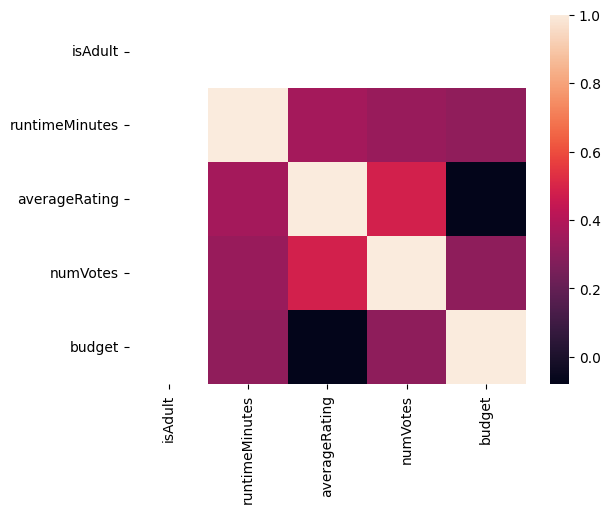

In [14]:
sns.heatmap(df.corr(numeric_only=True))

1.Which movie had the largest budget?

In [15]:
print(df["budget"].idxmax())

# Output the result
#print("The movie with the largest budget is:")
#print(largest_budget_movie)

3055


2.Which movie in the dataset has the longest runtime?


In [16]:
longest_runtime_movie = df.loc[df["runtimeMinutes"].idxmax()]

# Output the result
print("The movie with the longest runtime is:")
print(longest_runtime_movie[["originalTitle", "runtimeMinutes"]])

The movie with the longest runtime is:
originalTitle     Zack Snyder's Justice League
runtimeMinutes                             242
Name: 2216, dtype: object


3.Which director has the most movies in this dataset?


In [17]:
director_counts = df["directors"].value_counts()

# Find the director with the most movies
#most_movies_director = 
print(director_counts.idxmax())
#most_movies_count = 
print(director_counts.max())


Steven Spielberg
30


4.Which movie has the highest number of votes?


In [19]:
highest_votes_movie = df.loc[df['numVotes'].idxmax()]
print(highest_votes_movie)

id                               tt0111161
primaryTitle      The Shawshank Redemption
originalTitle     The Shawshank Redemption
isAdult                                  0
runtimeMinutes                         142
genres                               Drama
averageRating                          9.3
numVotes                           2817283
budget                            25000000
directors                   Frank Darabont
Name: 529, dtype: object


5.What is the average rating of movies in the "Drama" genre?



In [23]:
drama_movies = df[df['genres'].str.contains('Drama', na=False)]

# Calculate the average rating for "Drama" movies
average_rating_drama = drama_movies['averageRating'].mean()
print(average_rating_drama)


7.054692556634304
